#  Stock Market Analysis Project 
**Dataset:** Apple, Microsoft, Netflix, Google stock data

**Libraries:** pandas, matplotlib, seaborn, plotly

**Tasks:** Trend analysis, moving averages, volatility, correlation, performance comparison

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 1. Load Dataset

In [2]:
df = pd.read_csv('stocks.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by=["Ticker", "Date"], inplace=True)
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [3]:
# Show 2 rows for each company (ticker)
df_grouped = df.groupby("Ticker").head(2)
df_grouped

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
186,GOOG,2023-02-07,103.629997,108.669998,103.547997,108.040001,108.040001,33738800
187,GOOG,2023-02-08,102.690002,103.580002,98.455002,100.000000,100.000000,73546000
62,MSFT,2023-02-07,260.529999,268.769989,260.079987,267.559998,266.891510,50841400
63,MSFT,2023-02-08,273.200012,276.760010,266.209991,266.730011,266.063599,54686000
124,NFLX,2023-02-07,358.510010,364.179993,354.179993,362.950012,362.950012,6289400
125,NFLX,2023-02-08,360.019989,368.190002,358.309998,366.829987,366.829987,6253200


 **Insight**
- Extracted the first 2 records for each ticker (AAPL, GOOG, MSFT, NFLX).  
- Confirms dataset structure with multiple companies and time-series data.  

## 2. Exploratory Data Analysis (EDA)

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 0 to 185
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ticker     248 non-null    object        
 1   Date       248 non-null    datetime64[ns]
 2   Open       248 non-null    float64       
 3   High       248 non-null    float64       
 4   Low        248 non-null    float64       
 5   Close      248 non-null    float64       
 6   Adj Close  248 non-null    float64       
 7   Volume     248 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 17.4+ KB
None


In [5]:
print(df.describe())

                                Date        Open        High         Low  \
count                            248  248.000000  248.000000  248.000000   
mean   2023-03-22 22:27:05.806451712  215.252093  217.919662  212.697452   
min              2023-02-07 00:00:00   89.540001   90.129997   88.860001   
25%              2023-03-01 00:00:00  135.235004  137.440004  134.822495   
50%              2023-03-22 12:00:00  208.764999  212.614998  208.184998   
75%              2023-04-14 00:00:00  304.177505  307.565002  295.437500   
max              2023-05-05 00:00:00  372.410004  373.829987  361.739990   
std                              NaN   91.691315   92.863023   90.147881   

            Close   Adj Close        Volume  
count  248.000000  248.000000  2.480000e+02  
mean   215.381674  215.362697  3.208210e+07  
min     89.349998   89.349998  2.657900e+06  
25%    136.347498  136.347498  1.714180e+07  
50%    209.920006  209.920006  2.734000e+07  
75%    303.942505  303.942505  4.771772

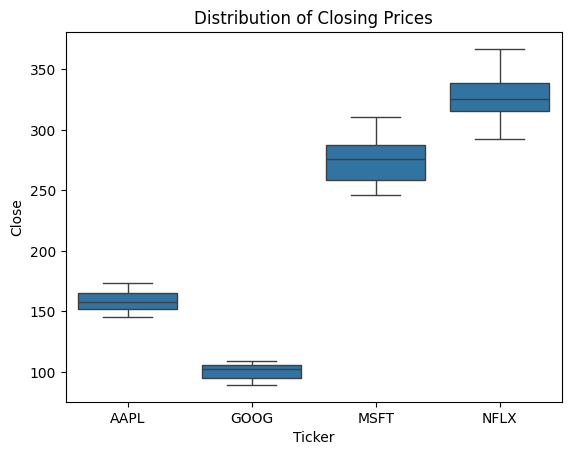

In [6]:
sns.boxplot(x="Ticker", y="Close", data=df)
plt.title("Distribution of Closing Prices")
plt.show()

 **Insight**
- Prices range between ~$90 (GOOG) to ~$366 (NFLX).  
- Apple median ≈ $155 (stable), Google lowest & stable, Microsoft median ≈ $270, Netflix highest (~$330) but volatile.  
- Volume: Apple highest liquidity, Netflix lowest.  
- Stable stocks: **GOOG, AAPL** | Moderate: **MSFT** | High risk: **NFLX**  

## 3. Stock Price Trends

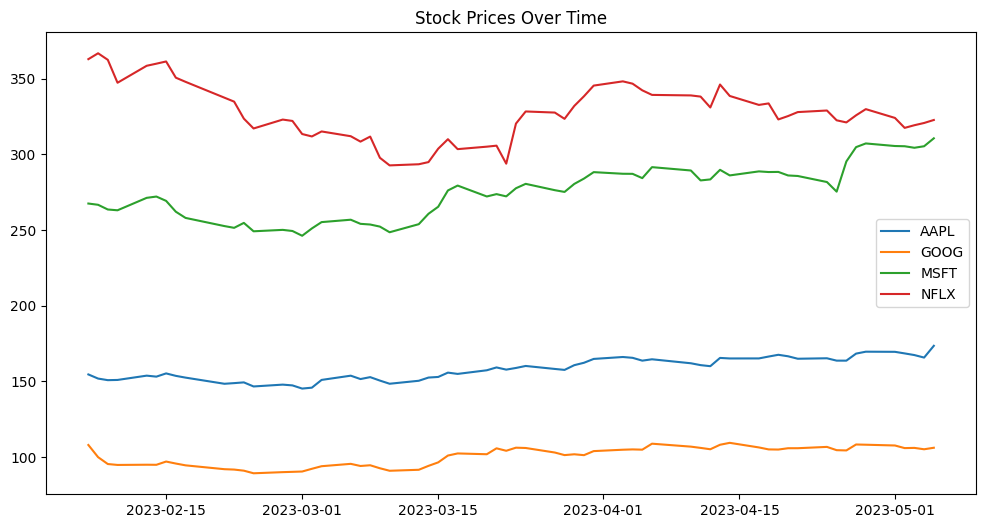

In [7]:
plt.figure(figsize=(12,6))
for ticker in df['Ticker'].unique():
    subset = df[df['Ticker'] == ticker]
    plt.plot(subset['Date'], subset['Close'], label=ticker)
plt.legend()
plt.title("Stock Prices Over Time")
plt.show()

**Insight**
- AAPL & MSFT show steady upward trends.  
- GOOG is flat with mild gains.  
- NFLX highest but volatile.  
- Safer growth: **AAPL, MSFT** | Risky: **NFLX** | Stable but slow: **GOOG**  


## 4. Moving Averages

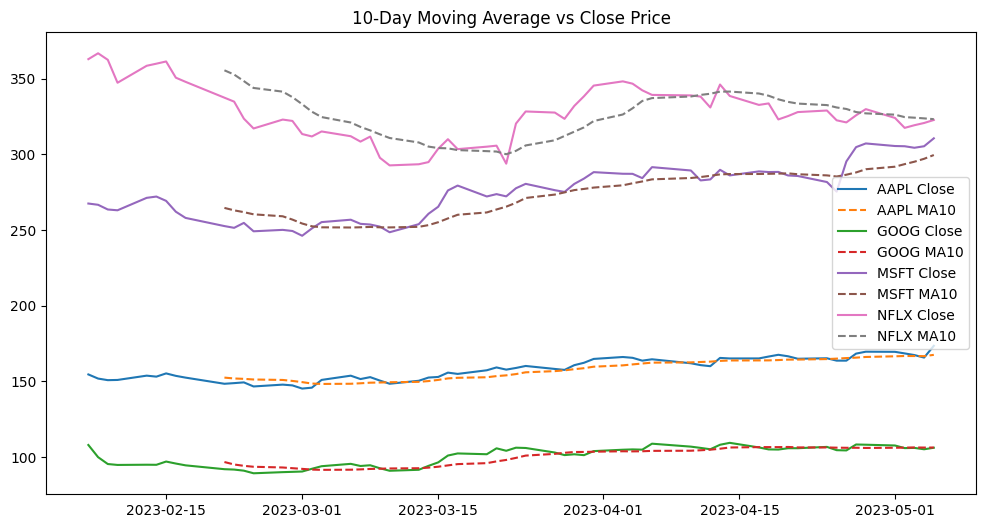

In [8]:
df['MA_10'] = df.groupby('Ticker')['Close'].transform(lambda x: x.rolling(10).mean())

plt.figure(figsize=(12,6))
for ticker in df['Ticker'].unique():
    subset = df[df['Ticker'] == ticker]
    plt.plot(subset['Date'], subset['Close'], label=f"{ticker} Close")
    plt.plot(subset['Date'], subset['MA_10'], linestyle="--", label=f"{ticker} MA10")
plt.legend()
plt.title("10-Day Moving Average vs Close Price")
plt.show()

 **Insight**
- AAPL & MSFT align well with MA → steady.  
- NFLX shows larger deviations → volatility.  
- GOOG flat, weak momentum.  

## 5. Volatility Analysis

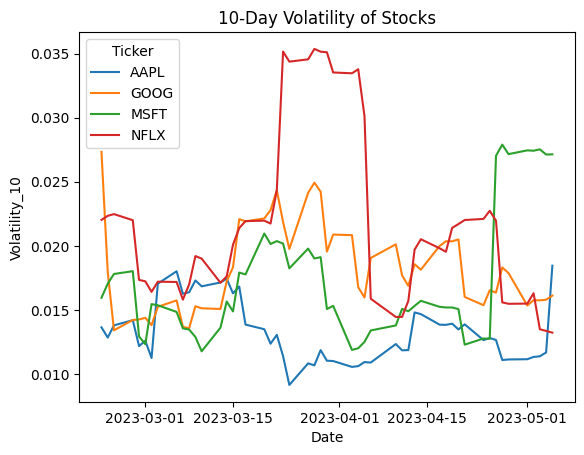

In [9]:
df['Returns'] = df.groupby('Ticker')['Close'].pct_change()
df['Volatility_10'] = df.groupby('Ticker')['Returns'].transform(lambda x: x.rolling(10).std())

sns.lineplot(x="Date", y="Volatility_10", hue="Ticker", data=df)
plt.title("10-Day Volatility of Stocks")
plt.show()

 **Insight**
- NFLX: highest volatility spikes → riskiest.  
- GOOG: moderate volatility around April.  
- AAPL & MSFT: lower, more stable.  


## 6. Correlation Analysis

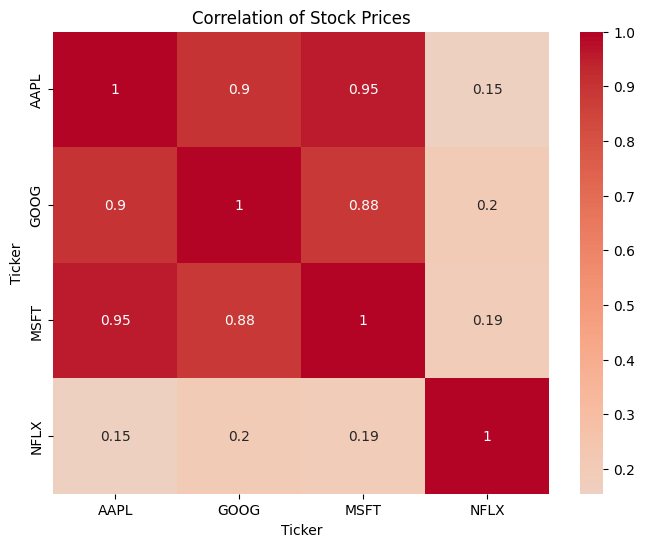

In [10]:
pivot = df.pivot(index="Date", columns="Ticker", values="Close")
corr = pivot.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Stock Prices")
plt.show()

 **Insight**
- AAPL–MSFT–GOOG strongly correlated (0.88–0.95).  
- NFLX weakly correlated (~0.15–0.22) → independent, useful for diversification.  


## 7. Performance Analysis

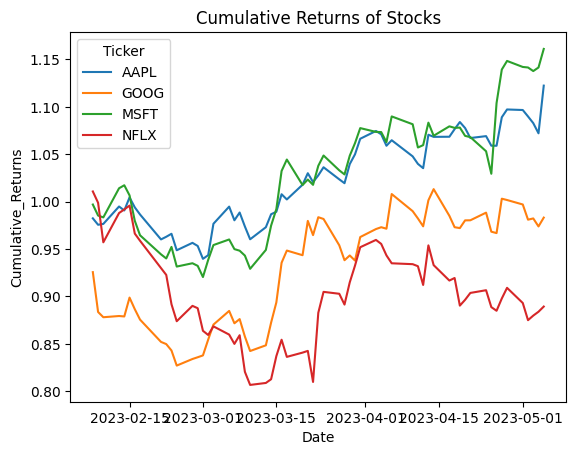

In [11]:
# Cumulative returns
df['Cumulative_Returns'] = (1 + df['Returns']).groupby(df['Ticker']).cumprod()
sns.lineplot(x="Date", y="Cumulative_Returns", hue="Ticker", data=df)
plt.title("Cumulative Returns of Stocks")
plt.show()

In [14]:
performance = df.groupby("Ticker")['Close'].apply(lambda x: (x.iloc[-1] - x.iloc[0] )/ x.iloc[0] * 100 )
print("3-Month Performance (% Change):\n", performance)

3-Month Performance (% Change):
 Ticker
AAPL    12.234086
GOOG    -1.689193
MSFT    16.104798
NFLX   -11.073151
Name: Close, dtype: float64


 **Insight**
- AAPL: +12.2% → steady growth.  
- MSFT: +16.1% → best performer.  
- GOOG: -1.7% → slightly negative.  
- NFLX: -11.1% → worst performer.  


## 8. Interactive Plot

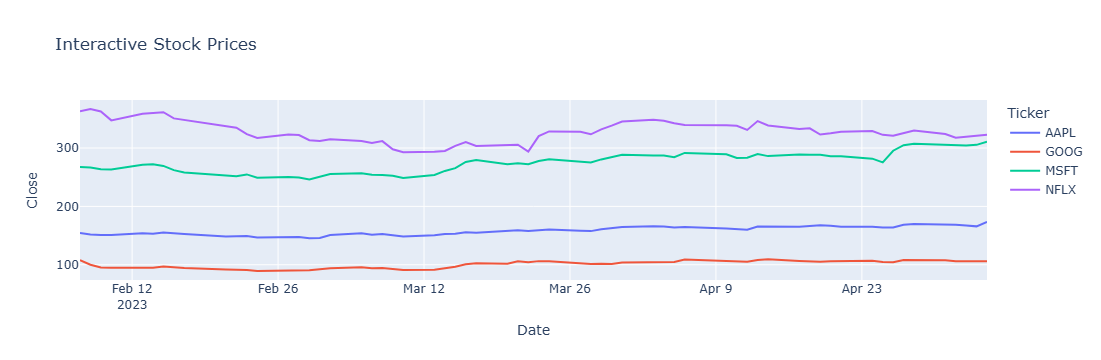

In [15]:
fig = px.line(df, x="Date", y="Close", color="Ticker", title="Interactive Stock Prices")
fig.show()

📊 **Insight**
- Confirms earlier findings.  
- MSFT & AAPL rising, GOOG flat, NFLX falling.  
- Interactive tool helps zoom & filter.  


##  Final Conclusion
- Best for conservative investors → **AAPL, MSFT** (steady growth, low volatility).  
- Risk takers → **NFLX** (volatile, independent, diversification benefits).  
- Moderate → **GOOG** (stable but less growth).  
